# Quantifying Shakespeare
Analyzing the frequencies of different letters in Shakespeare's work.

(Data from: bit.ly/shakespeare-txt)

In this notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequenceis of letters used
3. Visualize the frequencies with a bar graph.

## Read the lines of the data

In [12]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """"Read a .txt file into a list of strings for each line."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r",)
    for line in file_handle:
        # string leading and trailing whitespace
        line = line.strip()
        # make everything lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines 

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))

124456


# Counting Letters


In [13]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by increasing the value stored at key by 1"""
    if key in counts: 
        counts[key] += 1
    else: 
        counts[key] = 1

In [14]:
d: dict[str, int] = {}
tally(d,"a")
#d = {"a": 1}
print(d)
tally(d, "a")
#d = {"a": 2}
print(d)
tally(d, "b")
# d = {"a": 2, "b": 1}
print(d)


{'a': 1}
{'a': 2}
{'a': 2, 'b': 1}


In [19]:
def count_letters(lines: list[str]) -> dict[str, int]:
    """Count the frequency of each letter in each line of lines."""
    counts: dict[str, int] = {}
    for line in lines: #line is a string
        for char in line:
            if char.isaplha():
                tally(counts, char)
    return counts 

shakes_letters: dict[str, int] = count_letters(shakes_lines)
print(shakes_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, ' ': 823058, 'e': 447204, '1': 928, '0': 299, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, ',': 83174, 'a': 289150, 'w': 89390, '.': 78025, 'm': 111452, 'k': 35408, '!': 8844, '*': 63, '<': 468, 'v': 37569, '9': 948, '-': 8074, '3': 330, '(': 628, ')': 629, '2': 366, '>': 441, '7': 41, '4': 93, '[': 2085, '#': 1, ']': 2077, 'z': 1631, '8': 40, '@': 8, ':': 1827, '=': 1, '%': 1, '"': 470, '/': 5, '6': 63, '5': 82, "'": 31069, ';': 17199, '~': 1, '_': 71, 'q': 3582, '?': 10476, '|': 33, '&': 21, '`': 1, '}': 2}


# Sorting in Lists and Dictionaries

In [20]:
# Get list of items of a dictionary
shakes_letters_list = list(shakes_letters.items())
shakes_letters_list
#print(shakes_letters)list)
shakes_letters_list = sorted(shakes_letters_list)
#print(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
shakes_letters_sorted

{' ': 823058,
 '!': 8844,
 '"': 470,
 '#': 1,
 '%': 1,
 '&': 21,
 "'": 31069,
 '(': 628,
 ')': 629,
 '*': 63,
 ',': 83174,
 '-': 8074,
 '.': 78025,
 '/': 5,
 '0': 299,
 '1': 928,
 '2': 366,
 '3': 330,
 '4': 93,
 '5': 82,
 '6': 63,
 '7': 41,
 '8': 40,
 '9': 948,
 ':': 1827,
 ';': 17199,
 '<': 468,
 '=': 1,
 '>': 441,
 '?': 10476,
 '@': 8,
 '[': 2085,
 ']': 2077,
 '_': 71,
 '`': 1,
 'a': 289150,
 'b': 61956,
 'c': 88185,
 'd': 149462,
 'e': 447204,
 'f': 80516,
 'g': 68199,
 'h': 236868,
 'i': 253990,
 'j': 4779,
 'k': 35408,
 'l': 170019,
 'm': 111452,
 'n': 243262,
 'o': 314600,
 'p': 58464,
 'q': 3582,
 'r': 237864,
 's': 248989,
 't': 329775,
 'u': 128947,
 'v': 37569,
 'w': 89390,
 'x': 5294,
 'y': 94370,
 'z': 1631,
 '|': 33,
 '}': 2,
 '~': 1}

# Visualize Data in Bar Graph

<BarContainer object of 64 artists>

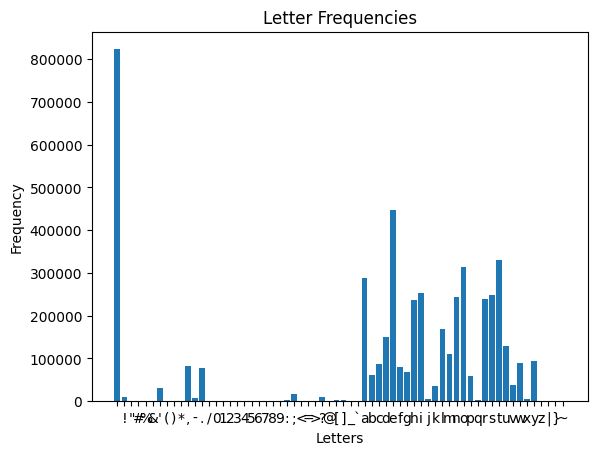

In [22]:
from matplotlib import pyplot

pyplot.title("Letter Frequencies")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
x_values: list[str] = shakes_letters_sorted.keys() # my letters
y_values: list[int] = shakes_letters_sorted.values() # my letter counts
pyplot.bar(x_values, y_values)